Universidad Galileo  
Maestría en Data Science  
Ciencia de datos en Python  
Sección U  


   # **PROYECTO DEL CURSO**


<p style="text-align: right;">
Henry Giovanni<br/>
Barrientos García<br/>
21001538<br/>
Guatemala, 07 de abril de 2021<br/>
</p>

# PROYECTO DEL CURSO

### Usando sclicing con NumPy separar los datos en 2 datasets:
* entrenamiento (80%)
* validación y pruebas (20%) 

In [85]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

all_data = np.load('proyecto_data\proyecto_training_data.npy')
# twenty_percent = int(.20 * len(all_data))
# test_data = all_data[slice(twenty_percent)]
# train_data = all_data[slice(twenty_percent, len(all_data))]
eighty_percent = int(.80 * len(all_data))
train_data = all_data[slice(eighty_percent)]
test_data = all_data[slice(eighty_percent, len(all_data))]

### Análisis exploratorio de datos.
Para cada variable en el dataset calcular:
* Media
* Valor máximo
* Valor mínimo 
* Rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
* Desviación estándar 


In [86]:
print ("MEDIA:\n", np.nanmean(train_data, axis = 0) ) #train_data.mean(axis = 0) )
max_arr = np.nanmax(train_data, axis = 0)
print ("MÁXIMO:\n", max_arr )
min_arr = np.nanmin(train_data, axis = 0)
print ("MÍNIMO:\n", min_arr )
print ("RANGO:\n", (max_arr - min_arr) )
print ("DESVIACIÓN ESTÁNDAR:\n", np.nanstd(train_data, axis = 0) )

MEDIA:
 [1.80590277e+05 6.10102740e+00 1.15632363e+03 6.48544521e+00
 1.97145120e+03 6.99469854e+01]
MÁXIMO:
 [7.550e+05 1.000e+01 3.228e+03 1.400e+01 2.010e+03 3.130e+02]
MÍNIMO:
 [3.490e+04 1.000e+00 3.340e+02 2.000e+00 1.875e+03 2.100e+01]
RANGO:
 [7.201e+05 9.000e+00 2.894e+03 1.200e+01 1.350e+02 2.920e+02]
DESVIACIÓN ESTÁNDAR:
 [7.87819511e+04 1.37743519e+00 3.73620332e+02 1.60845172e+00
 2.99388821e+01 2.34659548e+01]


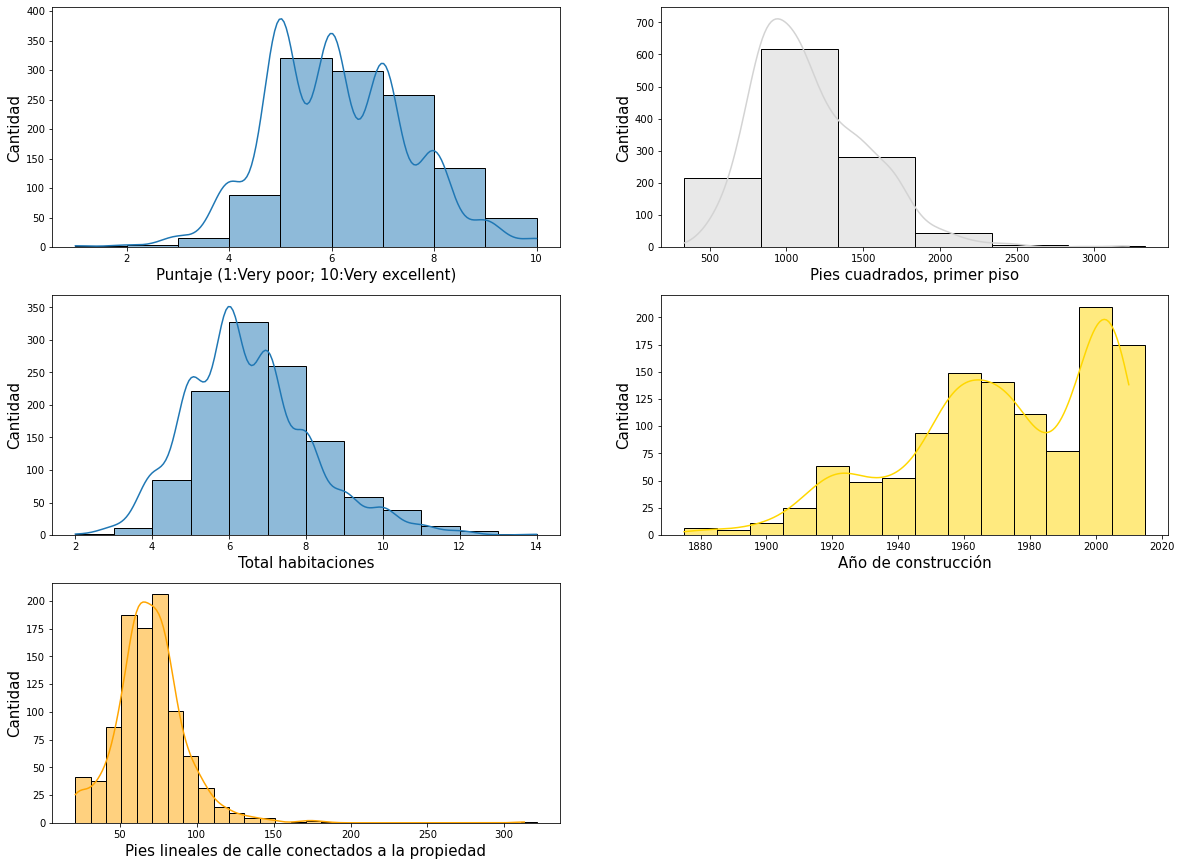

In [87]:
class HistChart():
    def __init__(self, column_name, binwidth, color, xlabel, ylabel = "Cantidad"):
        self.column_name = column_name
        self.binwidth = binwidth
        self.color = color
        self.xlabel = xlabel
        self.ylabel = ylabel

charts = [
    # HistChart("SalePrice", 30000, "yellowgreen", "Precio de venta USD"),
    HistChart("OverallQual", 1, None, "Puntaje (1:Very poor; 10:Very excellent)"),
    HistChart("1stFlrSF", 500, "lightgrey", "Pies cuadrados, primer piso"),
    HistChart("TotRmsAbvGrd", 1, None, "Total habitaciones"),
    HistChart("YearBuilt", 10, "gold", "Año de construcción"),
    HistChart("LotFrontage", 10, "orange", "Pies lineales de calle conectados a la propiedad")
]
dtframe = pd.DataFrame(train_data, columns=["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"])
fig  = plt.figure(figsize = (20, 15))
for index, chart in enumerate(charts):
    hplot = fig.add_subplot(3, 2, index+1)
    hplot = sns.histplot(data = dtframe, x = chart.column_name, binwidth = chart.binwidth, color = chart.color, kde = True)
    hplot.set_xlabel(chart.xlabel, fontsize = 15);
    hplot.set_ylabel (chart.ylabel, fontsize = 15);

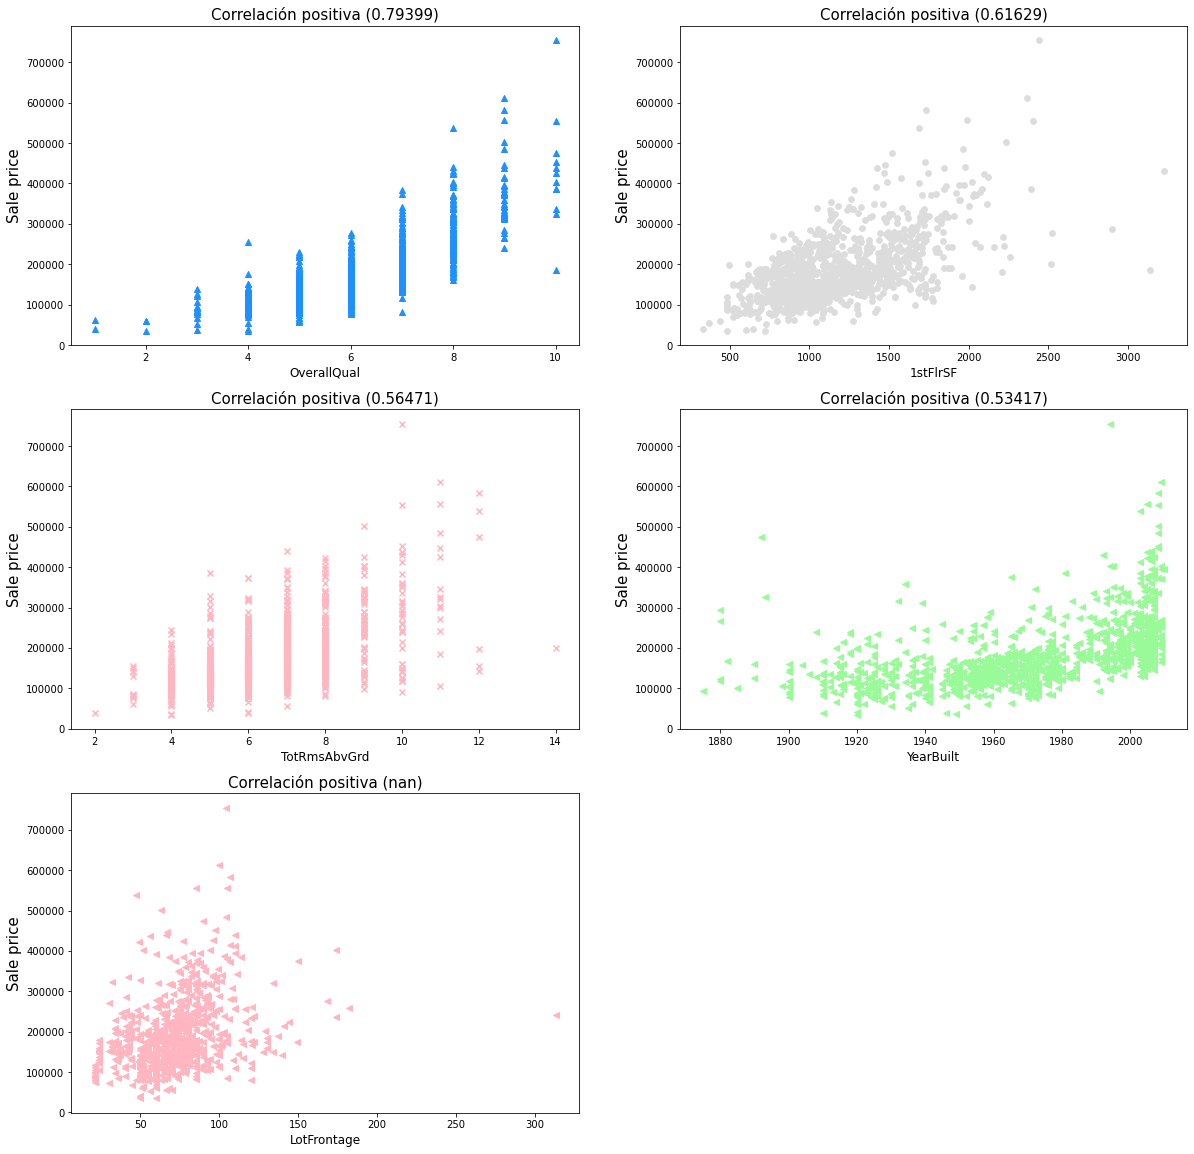

In [88]:
fig  = plt.figure(figsize = (20, 20))
marc = ["*", ">", "<", "o", "v", ".", "+", "8", "x", "^"]
kolor = ["peru", "olive", "aqua", "palegreen", "dodgerblue", "crimson", "lightpink", "goldenrod", "gainsboro", "coral"]
for index in range(dtframe.shape[1]):   # iterar columnas
    if (index > 0):   # solo las variables independientes
        y_vals = dtframe.iloc[: , 0].values
        x_vals = dtframe.iloc[: , index].values
        corrcoef = np.corrcoef(x_vals, y_vals)[0, 1]
        scarer = fig.add_subplot(3, 2, index) 
        scarer.scatter(x_vals, y_vals, marker = marc[np.random.randint(10)], color = kolor[np.random.randint(10)])  
        title = "No existe correlación"
        if (corrcoef != 0):
            title = "Correlación {} ({:.5})".format( ("negativa" if (corrcoef < 0) else "positiva"), corrcoef )
        scarer.set_title(title, fontsize = 15)
        scarer.set_xlabel(dtframe.columns[index], fontsize = 12)
        scarer.set_ylabel("Sale price", fontsize = 15)


## VARIABLES CON MÁS POTENCIAL PREDICTIVO
BasadoS en la gráfica y el coeficiente de correlación de cada par (x, y) es observable que las 2 variables con más potencial predictivo son:
1. OverallQual
2. 1stFlrSF

VARIABLE: OverallQual; ITERACIÓN: 0101; ERROR PROMEDIO: 9464438920.851486
VARIABLE: OverallQual; ITERACIÓN: 0351; ERROR PROMEDIO: 2477766717.0858254
VARIABLE: OverallQual; ITERACIÓN: 0601; ERROR PROMEDIO: 1538924766.642562
VARIABLE: OverallQual; ITERACIÓN: 0851; ERROR PROMEDIO: 1412330453.9072847
VARIABLE: OverallQual; ITERACIÓN: 1101; ERROR PROMEDIO: 1394825258.779842
VARIABLE: OverallQual; ITERACIÓN: 1351; ERROR PROMEDIO: 1391972333.7373197
VARIABLE: OverallQual; ITERACIÓN: 1601; ERROR PROMEDIO: 1391088450.7069576
VARIABLE: OverallQual; ITERACIÓN: 1851; ERROR PROMEDIO: 1390470201.4545224
VARIABLE: 1stFlrSF; ITERACIÓN: 0010; ERROR PROMEDIO: 1.7203222959185417e+49
VARIABLE: 1stFlrSF; ITERACIÓN: 0020; ERROR PROMEDIO: 3.65007501097483e+92
VARIABLE: 1stFlrSF; ITERACIÓN: 0030; ERROR PROMEDIO: 7.744506722578399e+135
VARIABLE: 1stFlrSF; ITERACIÓN: 0040; ERROR PROMEDIO: 1.6431822413437093e+179
VARIABLE: 1stFlrSF; ITERACIÓN: 0050; ERROR PROMEDIO: 3.4864039440957564e+222
VARIABLE: 1stFlrSF; ITE

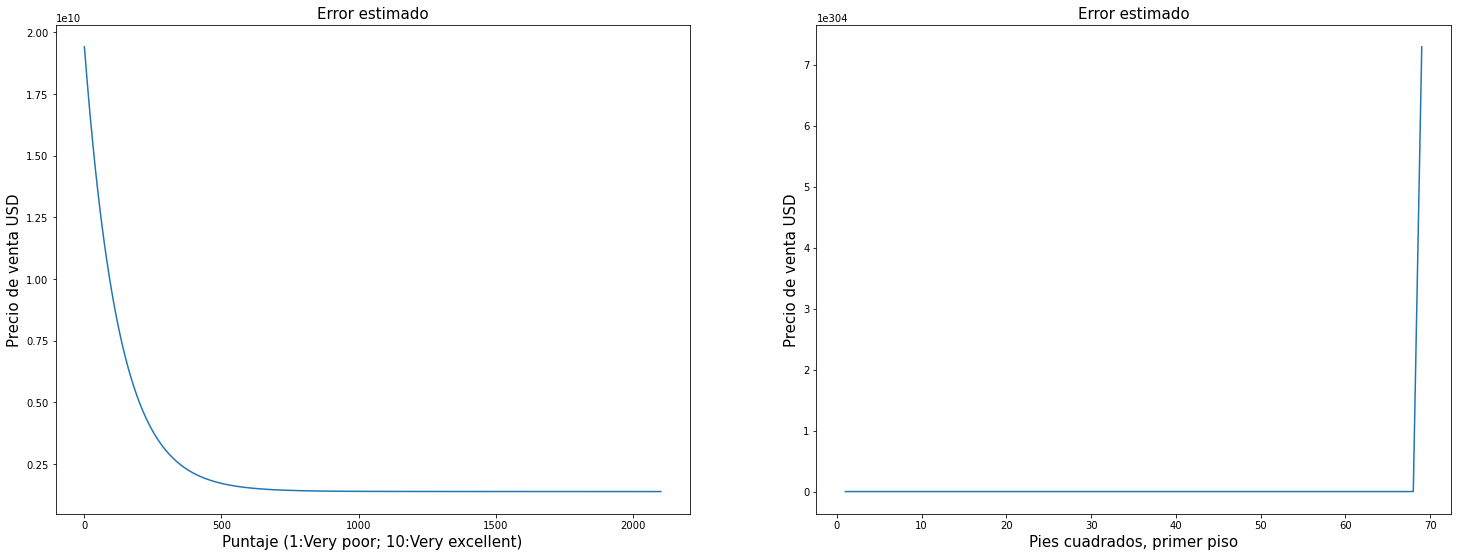

In [89]:
def do_graph(x_data, y_data, xlabel, ylabel, title, fig, plot_index):
    """
    Esta función permite visualizar, con matplotlib, como cambia el error en el tiempo.
    x_data: numpy array, conjunto de valores para el eje x
    y_data: numpy array, conjunto de valores para el eje x
    xlabel: str, titulo para el eje x
    ylabel: str, titulo para el eje y
    title:  str, titulo para la grafica
    fig:    figure, objeto canvas para ubicar en un grid las graficas
    plot_index: int, indice con el que será referenciada la gráfica
    """
#     print(x_data, "\n", y_data)
    xyplot = fig.add_subplot(1, 2, plot_index)
    xyplot.plot(x_data, y_data)
    xyplot.set_title(title, fontsize = 15)
    xyplot.set_xlabel(xlabel, fontsize = 15)
    xyplot.set_ylabel(ylabel, fontsize = 15)

    
def do_training(x_vals, y_vals, epochs, imprimir_error_cada, learning_rate, result, column_name, iteration = 1, mb = [0, 0]):
    """
    Entrena el modelo manual basado en los datos de entrada recibidos como parametro. 
    Esta función, de ser necesario es recursiva.
    PARAMETROS:
    x_vals: array, valores de x para la ejecución del modelo.
    y_vals: array, valores de y para los cuales se hara la predicción.
    epochs: int, cantidad de iteraciones para realizar el entreno.
    imprimir_error_cada: int, numero para indicar cada cuanto se debe imprimir el valor del error en ésa iteración.
    learning_rate: decimal, porcentaje de error para los calculos de cada iteración.
    result: array, contiene los valores que devuelve la función.
    column_name: str, nombre de la variable X que se está analizando.
    iteration: int, numero de iteración que se está ejecutando, es util para imprimir el error y para el resultado devuelto.
    mb: vector, tiene 2 posiciones, en una el valor de m y en la otra el de b.
    RETORNO:
    Retorna una matriz, donde: cada fila, representa una iteracion; y cada columna, representa un valor en 
    el orden (iteracion, valor_m, valor_b, error_promedio).
    """
    m = mb[0]
    b = mb[1]
    x_vals_one = np.c_[x_vals, np.ones(x_vals.shape[0])]
    yhat = np.add( np.multiply(m, x_vals), b)
    error_arr = np.divide( np.power( np.subtract(yhat, y_vals), 2), 2)
    error_mean = np.mean(error_arr)

    mb_grad = np.multiply(np.c_[np.subtract(yhat, y_vals), np.subtract(yhat, y_vals)], x_vals_one)
    # estimar nueva m y b
    m_mean = np.mean(mb_grad, axis = 0)[0]
    b_mean = np.mean(mb_grad, axis = 0)[1]
    m = np.subtract(m, np.multiply(learning_rate, m_mean) )
    b = np.subtract(b, np.multiply(learning_rate, b_mean) )
    if ((epochs%imprimir_error_cada) == 0 ):
        print("VARIABLE: {}; ITERACIÓN: {:0>4}; ERROR PROMEDIO: {}".format(column_name, iteration, error_mean))
    epochs -= 1
    result = np.r_[result, [[iteration, m, b, error_mean]] ]
    if (epochs > 0):
        iteration += 1
        result = do_training(x_vals, y_vals, epochs, imprimir_error_cada, learning_rate, result, column_name, iteration, [m, b])
    return result

# result = do_training(np.array([65,80,68]), np.array([208.5, 181.5, 223.5]), 10, 1, 0.0001, np.empty([0, 4]))
# do_graph(result[:,0], result[:,3])
# print(result)
# break

fig = plt.figure(figsize = (25, 9))
plot_index = 0
training_results = {}
for column_name in dtframe:
    if (column_name == "OverallQual"):
        result = do_training(dtframe[column_name].values, dtframe["SalePrice"].values, 2100, 250, 0.0001, np.empty([0, 4]), column_name)
        plot_index += 1
        do_graph(result[:,0], result[:,3], "Puntaje (1:Very poor; 10:Very excellent)", "Precio de venta USD", "Error estimado", fig, plot_index)
        training_results["OverallQual"] = result
    elif (column_name == "1stFlrSF"):
        result = do_training(dtframe[column_name].values, dtframe["SalePrice"].values, 69, 10, 0.0001, np.empty([0, 4]), column_name)
        plot_index += 1
        do_graph(result[:,0], result[:,3], "Pies cuadrados, primer piso", "Precio de venta USD", "Error estimado", fig, plot_index)
        training_results["1stFlrSF"] = result




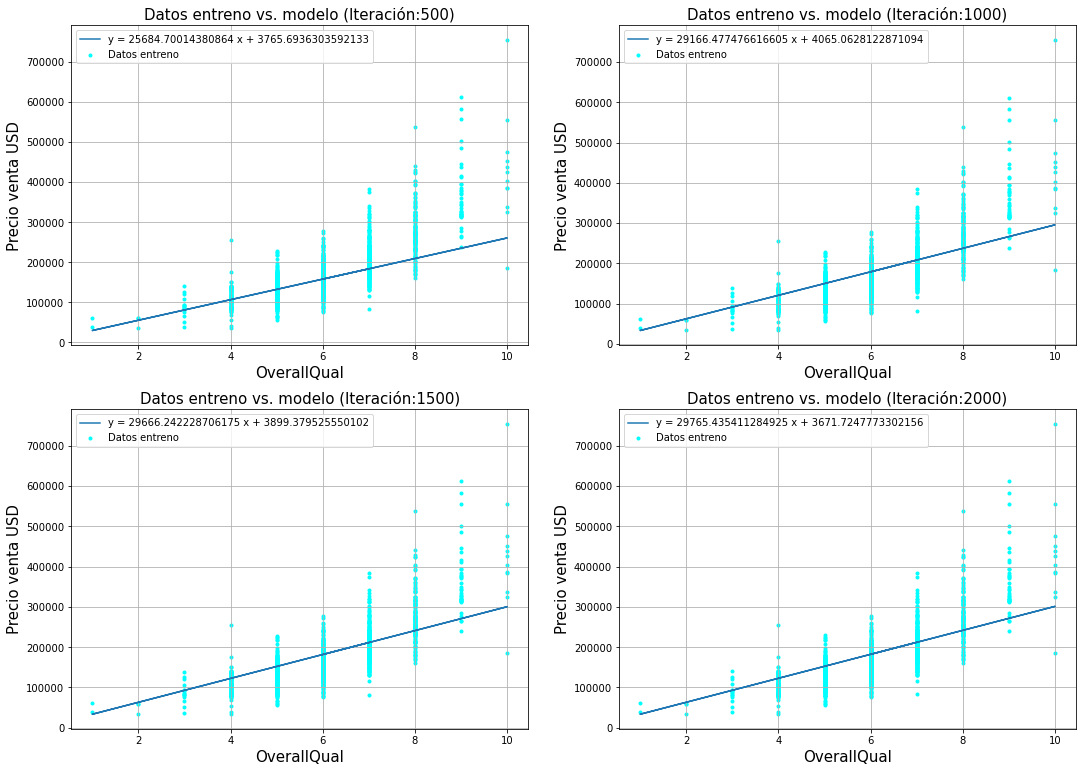

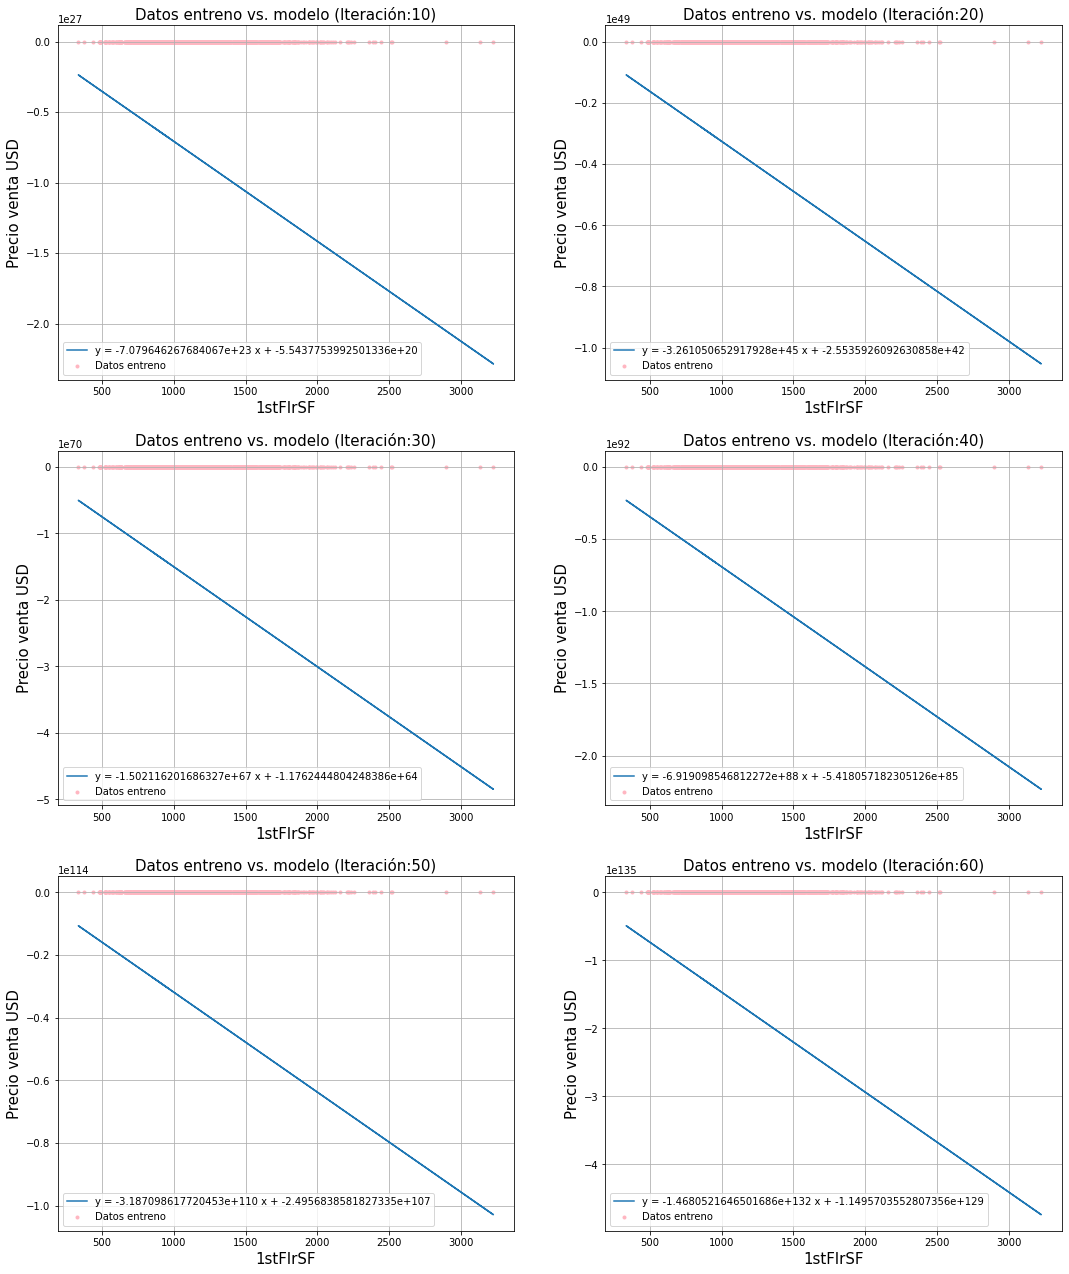

In [90]:
def do_graph_line_scatter(x_values, y_values, stimated_data, grap_every, varx_name):
    plot_index = 1
    num_charts = int( stimated_data.shape[0] / grap_every )
    # row in canvas should be dynamic. (2 columns in graph canvas)
    canvas_rows = 1 + int(num_charts / 2)
    fig = plt.figure(figsize = (18, int(5*num_charts) ))
    scatter_color = kolor[np.random.randint(10)]
    for n in range(grap_every, stimated_data.shape[0]+1, grap_every):
        m = stimated_data[n-1, 1]
        b = stimated_data[n-1, 2]
        xyplot = fig.add_subplot(canvas_rows, 2, plot_index)
        xyplot.plot(x_values, np.add( np.multiply(m, x_values), b), label = 'y = {} x + {}'.format(m, b) )
        xyplot.scatter(x_values, y_values, marker = ".", color = scatter_color, label = 'Datos entreno')
        xyplot.set_title("Datos entreno vs. modelo (Iteración:{})".format(n), fontsize = 15)
        xyplot.set_xlabel(varx_name, fontsize = 15)
        xyplot.set_ylabel("Precio venta USD", fontsize = 15)
        xyplot.legend()
        xyplot.grid(True)
        plot_index += 1


grap_index = 0
for column_name in training_results:
    if (column_name == "OverallQual"):
        do_graph_line_scatter(dtframe[column_name].values, dtframe["SalePrice"].values, training_results[column_name], 500, column_name)
    elif (column_name == "1stFlrSF"):
        do_graph_line_scatter(dtframe[column_name].values, dtframe["SalePrice"].values, training_results[column_name], 10, column_name)
        


### Entrenar modelo de regresión lineal con Scikit-learn
Para cada una de las variables x seleccionadas, usar scikit-learn para entrenar un modelo de regresión lineal

In [94]:
from sklearn.linear_model import LinearRegression

def get_linearregression(x_values, scklrn_model, 
                         m_manual, b_manual):
    """
    Determina y retorna las estimaciones que se obtienen con los modelos manual, con el de scikit-learn y un promedio de ambos. 
    La primera, son las estimaciones de precio de venta obtenidas con el modelo manual;
    la segunda, son las estimaciones de precio de venta obtenidas con el modelo de scikit-learn;
    la tercera, es el promedio de ambas estimaciones en cada fila.
    PARAMETROS:
    x_values: array, contiene los valores de la variable independiente con los cuales se haran las estimaciones.
    scklrn_model: LinearRegression, objeto linear regression del modelo obtenido con scikit-learn
    m_manual: decimal, es el valor de m obtenido de la ultima iteracion de entrenamiento manual
    b_manual: decimal, es el valor de b obtenido de la ultima iteracion de entrenamiento manual
    RETORNO:
    manual_predictions, scklrn_predictions, mean_predictions: vector list, lista de vectores: las predicciones manuales, las predicciones con scikit-learn y el promedio de ambas.
    """
    # Predicciones modelo manual
    manual_predictions = np.add( np.multiply( x_values, m_manual), b_manual)
    result = np.reshape(manual_predictions, (-1,1))
    # Predicciones modelo de scikit-learn
    scklrn_predictions = lr_model.predict( np.reshape(x_values, (-1,1)) )
    result = np.column_stack((result, scklrn_predictions))
    scklrn_predictions = np.reshape(scklrn_predictions, (1,-1))[0]
    # Promedio de ambas predicciones
    mean_predictions = np.reshape( np.mean(result, axis=1), (-1,1))
    mean_predictions = np.reshape( mean_predictions, (1,-1))[0]
    return manual_predictions, scklrn_predictions, mean_predictions


# Entrenamiento de modelo con scikit-learn de la primer variable independiente
lr_model = LinearRegression()
lr_model.fit( np.reshape(dtframe["OverallQual"].values, (-1,1)), 
             np.reshape(dtframe["SalePrice"].values, (-1,1)) )
lastrow = training_results["OverallQual"].shape[0] - 1
get_linearregression(dtframe["OverallQual"].values, lr_model, 
                     training_results["OverallQual"][lastrow, 1], training_results["OverallQual"][lastrow, 2])

# Entrenamiento de modelo con scikit-learn de la segunda variable independiente
lr_sqft_model = LinearRegression()
lr_sqft_model.fit( np.reshape(dtframe["1stFlrSF"].values, (-1,1)), 
                 np.reshape(dtframe["SalePrice"].values, (-1,1)) )
lastrow = training_results["1stFlrSF"].shape[0] - 1
get_linearregression(dtframe["1stFlrSF"].values, lr_sqft_model, 
                     training_results["1stFlrSF"][lastrow, 1], training_results["1stFlrSF"][lastrow, 2] )


(array([3.94663567e+154, 5.81851957e+154, 4.24171097e+154, ...,
        6.92505192e+154, 7.81027781e+154, 4.42152247e+154]),
 array([38776201.3836415 , 57213472.88798012, 41682569.30550768, ...,
        68112352.5949783 , 76831456.36057687, 43453637.25789489]),
 array([1.97331784e+154, 2.90925978e+154, 2.12085548e+154, ...,
        3.46252596e+154, 3.90513890e+154, 2.21076124e+154]))

### APLICACIÓN DE MODELOS PREDICTIVOS

Usando el 20% de los datos de validación, aplicamos los modelos predictivos para estimar la variable dependiente  y usando los valores reales de “y” calculamos el error de cada modelo.

In [92]:
lastrow = training_results["OverallQual"].shape[0] - 1
m = training_results["OverallQual"][lastrow, 1]
b = training_results["OverallQual"][lastrow, 2]
oq_est_manual, oq_est_scklrn, oq_med = get_linearregression(test_data[:,1], lr_model, m, b )
y_real_test = test_data[:,0]
oq_error_est_manual = np.subtract(oq_est_manual, y_real_test)
oq_error_est_scklrn = np.subtract(oq_est_scklrn, y_real_test)

lastrow = training_results["1stFlrSF"].shape[0] - 1
m = training_results["1stFlrSF"][lastrow, 1]
b = training_results["1stFlrSF"][lastrow, 2]
ffsf_est_manual, ffsf_est_scklrn, ffsf_med = get_linearregression(test_data[:,2], lr_sqft_model, m, b )
ffsf_error_est_manual = np.subtract(ffsf_est_manual, y_real_test)
ffsf_error_est_scklrn = np.subtract(ffsf_est_scklrn, y_real_test)




Graficar el  error de cada modelo para esta variable “x”


Error para 'OverallQual':
 1561177764.5134356 1315091304.4743197
Error para '1stFlrSF':
 inf 1632373985444402.2


<ipython-input-93-484387d60f0b>:5: RuntimeWarning: overflow encountered in power
  np.mean( np.divide( np.power(ffsf_error_est_manual, 2), 2)),
<ipython-input-93-484387d60f0b>:11: RuntimeWarning: overflow encountered in power
  means_guido = (np.mean( np.divide( np.power(ffsf_error_est_manual, 2), 2))


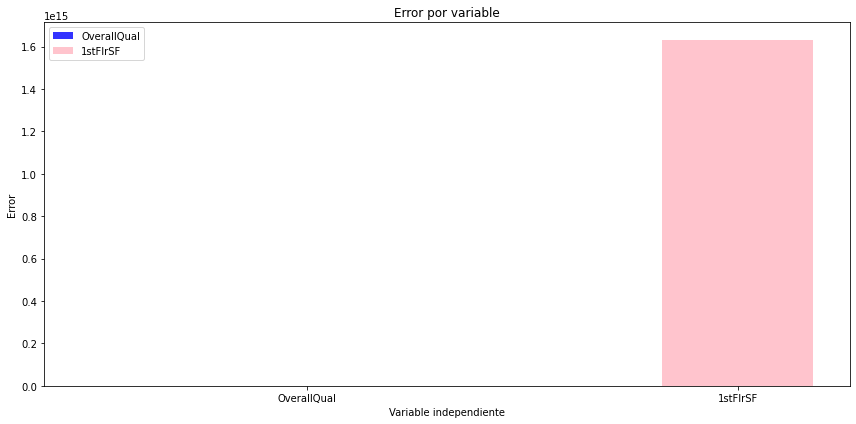

In [93]:
print("Error para 'OverallQual':\n", 
      np.mean( np.divide( np.power(oq_error_est_manual, 2), 2)), 
      np.mean( np.divide( np.power(oq_error_est_scklrn, 2), 2))   )
print("Error para '1stFlrSF':\n",
      np.mean( np.divide( np.power(ffsf_error_est_manual, 2), 2)), 
      np.mean( np.divide( np.power(ffsf_error_est_scklrn, 2), 2))   )

means_frank = (np.mean( np.divide( np.power(oq_error_est_manual, 2), 2))
              , np.mean( np.divide( np.power(oq_error_est_scklrn, 2), 2))   
              )
means_guido = (np.mean( np.divide( np.power(ffsf_error_est_manual, 2), 2))
              , np.mean( np.divide( np.power(ffsf_error_est_scklrn, 2), 2))   
              )

fig, ax = plt.subplots(figsize=(12, 6))
index = np.arange(2)
barwidth = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, barwidth,
                    alpha=opacity, color='blue', label='OverallQual')
rects2 = plt.bar(index + bar_width, means_guido, barwidth,
                    alpha=opacity, color='lightpink', label='1stFlrSF')

plt.xlabel('Variable independiente')
plt.ylabel('Error')
plt.title('Error por variable')
plt.xticks(index + barwidth, ('OverallQual', '1stFlrSF'))
plt.legend()
plt.tight_layout()
plt.show()

### CONCLUSIÓN

Luego de la carga de datos, la separación de datos para entreno y prueba, de realizar un análisis de los valores clave de nuestros datos, de haber creado un modelo manual y uno basado en la librería scikit-learn y adicional haber creado y estudiadio distintos tipos de gráficos para nuestras variables y valores, así como por último realizar una carga, estudio y ejecución de los datos de prueba en nuestros modelos y basados en ellos comparar los errores, hemos determinado que la varible que mejor se ajusta para realizar predicciones con el modelo encontrado y con los datos que se tienen es:


**OverallQual**
